In [1]:
import pandas as pd
from analysis.datasets import *
from analysis.first_analysis import *
from analysis.downloads import *
from analysis.explorative_analysis import *

C:\Users\Manuel\Documents\Masterarbeit\src\analysis\first_analysis.py:207: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, pdf, 'r-', label=f'Normal Fit\n$\mu={mean:.2f}$, $\sigma={std:.2f}$')
C:\Users\Manuel\Documents\Masterarbeit\src\analysis\first_analysis.py:207: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, pdf, 'r-', label=f'Normal Fit\n$\mu={mean:.2f}$, $\sigma={std:.2f}$')


In [3]:
find_minimum_start_date(
    lat_start=53.0, 
    lat_end=57.0, 
    lon_start=-2.0, 
    lon_end=-2.4, 
    lat_steps=1, 
    lon_steps=1
)

KeyboardInterrupt: 

In [3]:
result

In [2]:
load_actual_historical_weather_zenodo()

Data loaded successfully. Shape of the dataframe: (2208, 2)


,wind_speed_10m,wind_speed_100m
time,,
2024-09-02 00:00:00,0.94,2.67
2024-09-02 01:00:00,2.24,4.43
2024-09-02 02:00:00,1.30,3.61
2024-09-02 03:00:00,1.70,3.08
2024-09-02 04:00:00,1.53,3.09
...,...,...
2024-12-02 19:00:00,NaN,NaN
2024-12-02 20:00:00,NaN,NaN
2024-12-02 21:00:00,NaN,NaN


### Loading of historical forecasts to compare with actual SCADA data from Pennmanshiel

In [2]:
forecasts = load_forecast_data()

Data loaded successfully. Shape of the dataframe: (6816, 3)


Summary statistics for time frame: 2021-03-23 - 2021-12-31
First 5 rows of the dataframe:


,wind_speed_10m,wind_speed_80m,wind_speed_120m
time,,,
2021-03-23 00:00:00,3.33,7.59,8.64
2021-03-23 01:00:00,3.34,7.86,8.83
2021-03-23 02:00:00,4.39,8.43,9.41
2021-03-23 03:00:00,4.81,8.66,9.63
2021-03-23 04:00:00,4.74,8.70,9.61



Last 5 rows of the dataframe:


,wind_speed_10m,wind_speed_80m,wind_speed_120m
time,,,
2021-12-31 19:00:00,4.46,7.73,8.48
2021-12-31 20:00:00,3.36,7.08,7.80
2021-12-31 21:00:00,3.90,8.10,8.69
2021-12-31 22:00:00,5.99,9.82,10.45
2021-12-31 23:00:00,5.46,9.15,9.71



Summary statistics of the dataframe for time frame: 2021-03-23 - 2021-12-31


,wind_speed_10m,wind_speed_80m,wind_speed_120m
count,6816.000000,6816.000000,6816.000000
mean,4.258015,6.325411,6.780738
std,2.712134,4.057988,4.304149
min,0.000000,0.100000,0.100000
25%,2.150000,3.100000,3.370000
50%,3.610000,5.560000,6.010000
75%,5.990000,8.892500,9.520000
max,22.980000,33.400000,35.520000


Expected number of entries: 6816 (2021-03-23 00:00:00 - 2021-12-31 23:00:00) 
Actual number of entries: 6816

Shape of dataframe (rows, columns) for time frame: 2021-03-23 - 2021-12-31


(6816, 3)


Checking for duplicates in the index for time frame: 2021-03-23 - 2021-12-31
Index column has no duplicates.

Rows with NaN values for wind_speed_10m:
In total there are: 0 NaN values for time frame 2021-03-23 00:00:00 - 2021-12-31 23:00:00

Rows with NaN values for wind_speed_80m:
In total there are: 0 NaN values for time frame 2021-03-23 00:00:00 - 2021-12-31 23:00:00

Rows with NaN values for wind_speed_120m:
In total there are: 0 NaN values for time frame 2021-03-23 00:00:00 - 2021-12-31 23:00:00


,wind_speed_10m,wind_speed_80m,wind_speed_120m
time,,,


No power-related columns found. Skipping power plots.

Columns containing 'Wind Speed':
Plotting histogram for: wind_speed_10m


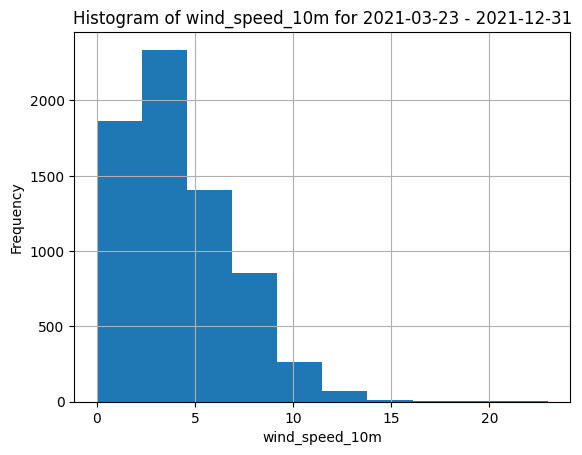

Plotting histogram for: wind_speed_80m


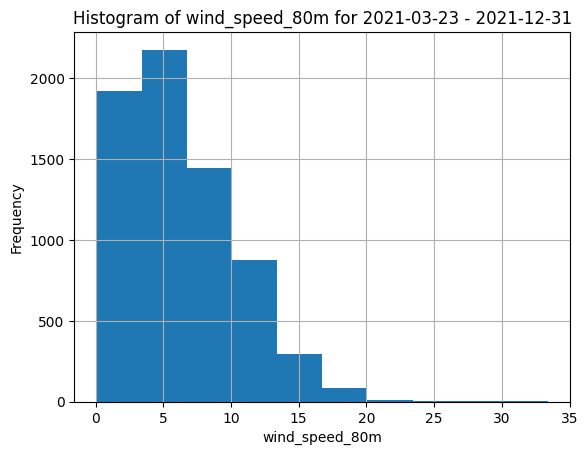

Plotting histogram for: wind_speed_120m


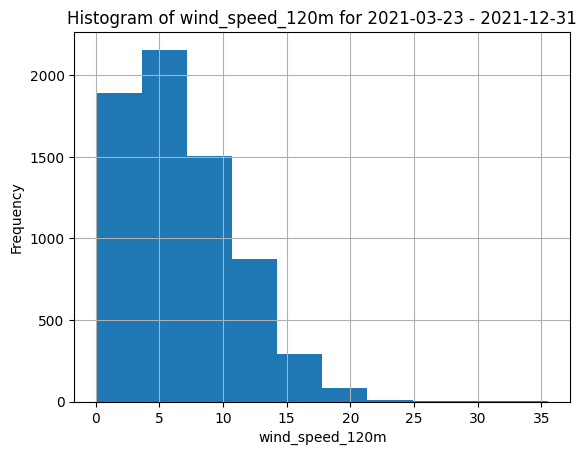

No power-related columns found. Skipping specific month plot for power data.


In [3]:
explorative_analysis(forecasts)

In [31]:
forecasts_filter = forecasts.loc['2021-04']
forecasts_filter

,wind_speed_10m,wind_speed_80m,wind_speed_120m
time,,,
2021-04-01 00:00:00,4.49,6.88,7.39
2021-04-01 01:00:00,4.50,6.34,6.90
2021-04-01 02:00:00,3.83,6.37,6.93
2021-04-01 03:00:00,3.32,5.73,6.35
2021-04-01 04:00:00,3.25,5.52,6.14
...,...,...,...
2021-04-30 19:00:00,2.13,3.41,3.69
2021-04-30 20:00:00,1.75,2.77,3.11
2021-04-30 21:00:00,1.20,1.92,2.24


In [3]:
t_2021 = load_turbine_electricity_data_dynamic(2021)

Attempting to load file: ..\data\zenodo_turbine_data\raw\2021\Turbine_Data_Penmanshiel_09_2021-01-01_-_2021-07-01_1049.csv


In [32]:
t_2021_filtered = t_2021.loc['2021-04']

In [36]:
t_2021_resampled = t_2021_filtered.resample('1H').mean()
t_2021_resampled

,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
time,,,,,,,,,,,,,,,,,,,,,
2021-04-01 00:00:00,7.839040,0.644821,6.399650,9.134525,6.6,7.847933,0.509740,6.747194,8.842151,7.898158,...,20.429802,5.688734,60.621465,5.809047,44.017553,5.755109,5.755109,0.0,13.023396,9.648718
2021-04-01 01:00:00,6.792900,0.612143,5.393525,7.966701,6.6,6.831459,0.487330,5.864993,7.850695,6.719284,...,15.480302,7.486137,98.742624,4.938695,34.722584,5.992787,5.992787,0.0,22.399190,7.551302
2021-04-01 02:00:00,6.132581,0.587494,4.832525,7.250675,6.6,6.163164,0.488106,5.124471,7.307318,6.120572,...,15.056748,8.758135,148.699093,4.261344,34.421706,5.434520,5.434520,0.0,32.729926,7.170511
2021-04-01 03:00:00,5.311675,0.581809,3.929300,6.384950,6.6,5.461718,0.471387,4.444539,6.455309,5.323991,...,18.244665,8.713041,173.582698,3.850995,61.021143,5.626204,5.626204,0.0,38.848149,12.632505
2021-04-01 04:00:00,5.365315,0.536579,4.145750,6.421850,6.6,5.508474,0.465094,4.392931,6.423594,5.376675,...,17.012819,9.894466,151.737921,4.851212,43.207819,5.260396,5.260396,0.0,34.037071,9.554225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30 19:00:00,2.517124,0.373153,1.575250,3.198000,6.6,2.494160,0.302824,1.803102,3.085109,2.578150,...,4.396706,1.570140,7.711775,1.449545,6.911021,3.902513,3.902513,0.0,1.568659,1.510526
2021-04-30 20:00:00,2.988369,0.298108,2.346688,3.615125,6.6,2.858214,0.268103,2.256324,3.407141,3.000451,...,4.608435,1.603352,7.955023,1.786724,8.246733,3.913203,3.913203,0.0,1.597788,1.634578
2021-04-30 21:00:00,2.913458,0.362571,2.004625,3.444500,6.6,2.900540,0.301486,2.201550,3.398634,2.919088,...,4.348598,1.661638,7.073436,1.263928,8.429450,3.902037,3.902037,0.0,1.569467,1.673707


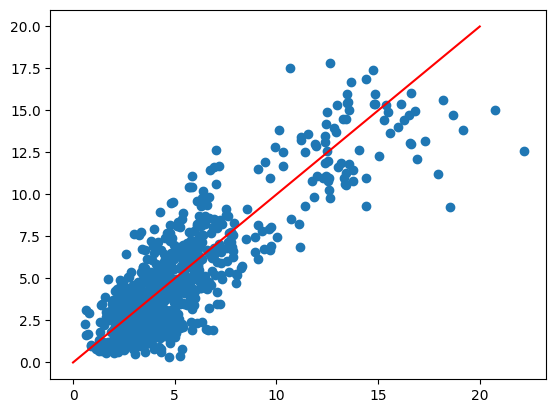

In [49]:
df2_wind_speed = t_2021_resampled[['Wind speed (m/s)']]

# Merge dataframe1 and df2_wind_speed based on the time index
merged_df = pd.merge(forecasts_filter, df2_wind_speed, left_index=True, right_index=True, how='left')

x = np.linspace(0,20)
y = x
# Display the merged dataframe
plt.scatter(merged_df['Wind speed (m/s)'], merged_df['wind_speed_80m'])
plt.plot(x,y, c='r')

(array([  1.,  11.,  10.,  35.,  83., 143., 164., 149.,  82.,  27.,  10.,
          2.,   1.,   0.,   2.]),
 array([-6.82091712, -5.72609644, -4.63127576, -3.53645508, -2.44163441,
        -1.34681373, -0.25199305,  0.84282763,  1.93764831,  3.03246898,
         4.12728966,  5.22211034,  6.31693102,  7.4117517 ,  8.50657237,
         9.60139305]),
 <BarContainer object of 15 artists>)

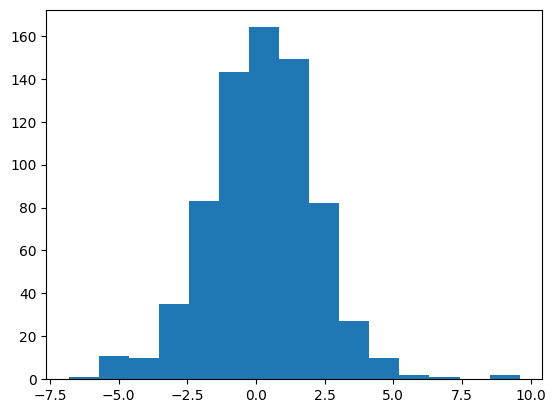

In [56]:
plt.hist(merged_df['Wind speed (m/s)'] - merged_df['wind_speed_80m'], bins=15)

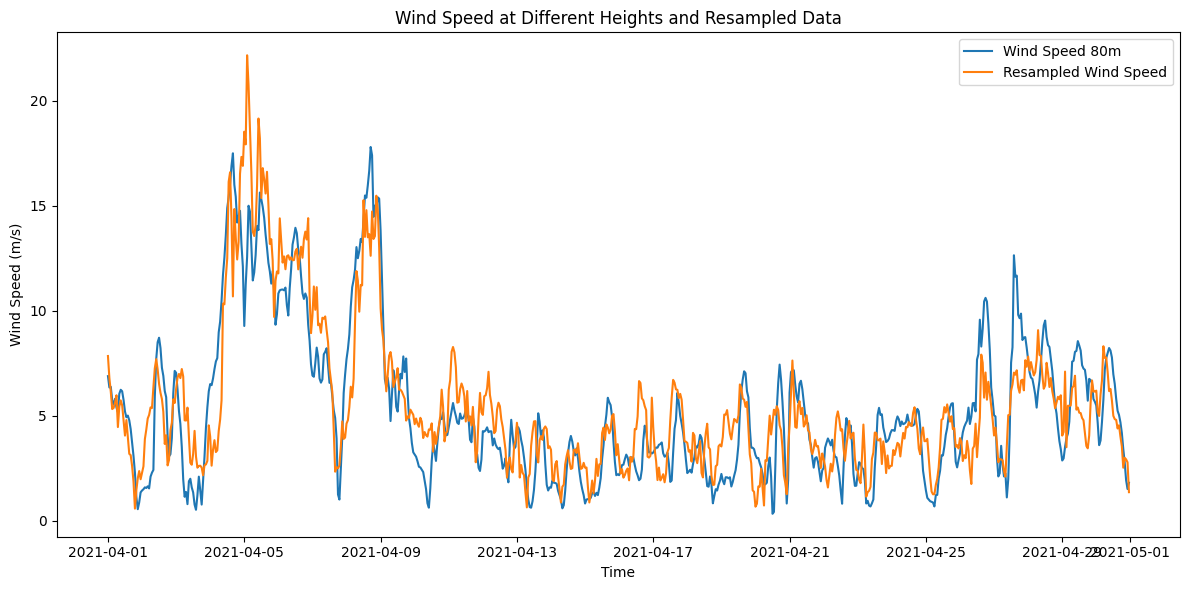

In [35]:
# Set the width and height of the plot (in inches)
plt.figure(figsize=(12, 6))

# Plot the wind speed data for 10m, 80m, and 120m
#plt.plot(forecasts_filter.index, forecasts_filter['wind_speed_10m'], label='Wind Speed 10m')
plt.plot(forecasts_filter.index, forecasts_filter['wind_speed_80m'], label='Wind Speed 80m')
#plt.plot(forecasts_filter.index, forecasts_filter['wind_speed_120m'], label='Wind Speed 120m')

# Plot the resampled wind speed data (t_2021_resampled) with the appropriate label
plt.plot(t_2021_resampled.index, t_2021_resampled['Wind speed (m/s)'], label='Resampled Wind Speed')

# Add a title, labels, and a legend
plt.title("Wind Speed at Different Heights and Resampled Data")
plt.xlabel("Time")
plt.ylabel("Wind Speed (m/s)")
plt.legend()  # Add the legend

# Display the plot
plt.tight_layout()  # Adjust the layout to ensure everything fits
plt.show()

### Loading of 4 points near Pennmanshiel for time period 2024-08-21 - 2024-11-21 from historical forecast api

In [2]:
one_day_forecast_geographic_center = pd.read_excel('../data/weather_forecast/raw/open-meteo-51.00N12.88E250_DWD_Forecast.xlsx'
            , skiprows=3)
one_day_forecast_geographic_center_processed = one_day_forecast_geographic_center.rename(columns={
    'wind_speed_10m (m/s)': 'v10_d0', 
    'wind_speed_10m_previous_day1 (m/s)': 'v10_d1', 
    'wind_speed_80m (m/s)': 'v80_d0', 
    'wind_speed_80m_previous_day1 (m/s)':'v80_d1',
    'wind_speed_120m (m/s)': 'v120_d0',
    'wind_speed_120m_previous_day1 (m/s)': 'v120_d1',
    'wind_speed_180m (m/s)': 'v180_d0',
    'wind_speed_180m_previous_day1 (m/s)': 'v180_d1'
    }, inplace=False)
one_day_forecast_geographic_center_processed = one_day_forecast_geographic_center_processed.set_index('time')
one_day_forecast_geographic_center_processed

,v10_d0,v10_d1,v80_d0,v80_d1,v120_d0,v120_d1,v180_d0,v180_d1
time,,,,,,,,
2024-08-21 00:00:00,2.44,3.30,5.51,5.91,6.74,7.67,7.96,8.94
2024-08-21 01:00:00,3.20,3.58,5.76,6.56,7.50,8.41,8.61,9.65
2024-08-21 02:00:00,3.69,3.61,6.55,6.95,8.20,8.77,9.44,9.96
2024-08-21 03:00:00,5.01,3.80,8.28,6.88,9.44,8.42,10.44,9.67
2024-08-21 04:00:00,4.84,2.97,8.15,6.04,9.53,7.38,10.69,7.92
...,...,...,...,...,...,...,...,...
2024-11-21 19:00:00,2.33,2.06,5.17,4.14,6.44,4.96,7.52,5.66
2024-11-21 20:00:00,2.27,1.57,4.69,3.50,5.82,4.31,6.85,5.04
2024-11-21 21:00:00,1.98,1.49,4.74,3.19,5.89,4.08,6.82,4.91


In [54]:
historical = pd.read_excel('../data/weather_forecast/raw/open-meteo-51.00N12.88E314_Historical_Weather.xlsx'
            , skiprows=3)
historical.drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], inplace=True)
historical_processed = historical.rename(columns={
    'wind_speed_10m (m/s)': 'v10_h', 
    'wind_speed_100m (m/s)': 'v100_h'
    }, inplace=False)

historical_processed.isna().sum()

time       0
v10_h     47
v100_h    47
dtype: int64

In [52]:
result = pd.merge(one_day_forecast_geographic_center_processed, historical_processed, on="time", how="outer")
result.set_index('time', inplace=True)
result.isna().sum()

v10_d0      0
v10_d1      0
v80_d0      0
v80_d1      0
v120_d0     0
v120_d1     0
v180_d0     0
v180_d1     0
v10_h      47
v100_h     47
dtype: int64

In [ ]:
hourly_to_daily = minute_to_daily_50Hertz(result)
hourly_to_daily

,v10_d0_00_00,v10_d0_01_00,v10_d0_02_00,v10_d0_03_00,v10_d0_04_00,v10_d0_05_00,v10_d0_06_00,v10_d0_07_00,v10_d0_08_00,v10_d0_09_00,...,v100_h_14_00,v100_h_15_00,v100_h_16_00,v100_h_17_00,v100_h_18_00,v100_h_19_00,v100_h_20_00,v100_h_21_00,v100_h_22_00,v100_h_23_00
date,,,,,,,,,,,,,,,,,,,,,
2024-08-21,2.44,3.20,3.69,5.01,4.84,4.92,5.14,6.75,7.06,6.86,...,8.83,7.87,7.62,7.18,5.06,4.48,4.93,5.08,3.95,3.32
2024-08-22,1.30,1.00,1.17,1.26,1.12,1.10,1.81,2.20,3.04,3.13,...,4.19,4.33,4.22,4.10,5.09,6.45,7.00,7.22,6.54,6.96
2024-08-23,2.00,1.80,1.73,1.82,1.70,1.96,2.52,3.40,4.03,5.24,...,8.36,8.20,8.29,7.81,7.55,7.18,7.14,7.47,7.50,7.44
2024-08-24,1.39,1.20,1.56,1.36,1.48,1.52,1.81,2.11,2.20,2.40,...,6.13,6.40,6.65,7.37,9.02,8.43,7.79,8.17,8.31,8.35
2024-08-25,2.61,4.04,2.50,1.55,0.86,3.67,4.21,5.64,5.64,4.30,...,4.05,4.07,3.85,3.97,3.89,3.62,3.54,3.04,2.62,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-17,5.94,6.24,5.83,5.70,6.25,8.42,6.44,6.37,5.88,6.27,...,11.04,10.74,10.55,10.36,10.32,10.43,10.08,9.44,9.77,9.38
2024-11-18,4.89,4.83,4.41,5.66,5.17,3.33,2.52,2.91,4.88,5.00,...,8.35,8.13,8.03,7.45,7.57,7.99,7.91,7.86,7.60,7.74
2024-11-19,2.95,2.79,3.20,2.81,2.56,3.47,3.28,4.40,6.44,8.77,...,15.56,15.49,16.47,16.61,18.25,16.73,13.87,9.91,8.44,7.82


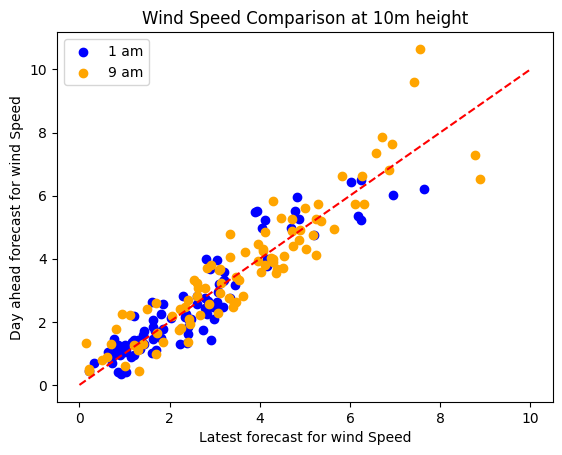

In [23]:
plt.scatter(hourly_to_daily['v10_d0_01_00'], hourly_to_daily['v10_d1_01_00'], label='1 am', color='blue')
plt.scatter(hourly_to_daily['v10_d0_09_00'], hourly_to_daily['v10_d1_09_00'], label='9 am', color='orange')

# Add axis labels
plt.xlabel('Latest forecast for wind Speed')
plt.ylabel('Day ahead forecast for wind Speed')


x = np.linspace(0, 10, 100)
y = x  # Diagonal line (y = x)

# Plot the diagonal line
plt.plot(x, y, color='red', linestyle='--')

# Add a title
plt.title('Wind Speed Comparison at 10m height')

# Add a legend
plt.legend()

plt.show()


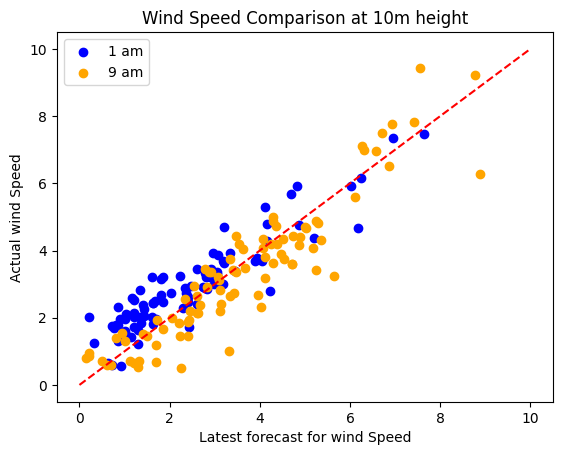

In [56]:
plt.scatter(hourly_to_daily['v10_d0_01_00'], hourly_to_daily['v10_h_01_00'], label='1 am', color='blue')
plt.scatter(hourly_to_daily['v10_d0_09_00'], hourly_to_daily['v10_h_09_00'], label='9 am', color='orange')

# Add axis labels
plt.xlabel('Latest forecast for wind Speed')
plt.ylabel('Actual wind Speed')


x = np.linspace(0, 10, 100)
y = x  # Diagonal line (y = x)

# Plot the diagonal line
plt.plot(x, y, color='red', linestyle='--')

# Add a title
plt.title('Wind Speed Comparison at 10m height')

# Add a legend
plt.legend()

plt.show()


d0 = latest forecast,
d1 = day ahead forecast,
h = actual values

examine difference d1 - h = (d1 - d0) + (d0 - h)
The open meteo blog tells says that the most recent forecast d0 is already very close to the actual value. But this is not what we see
The first difference (d1 - d0) is obtained from the forecast api
The parameter h is obtained from the historical api

(array([ 2.,  0.,  6.,  3., 10., 10., 11., 16., 13.,  9.,  3.,  3.,  4.,
         1.,  2.]),
 array([-1.49 , -1.286, -1.082, -0.878, -0.674, -0.47 , -0.266, -0.062,
         0.142,  0.346,  0.55 ,  0.754,  0.958,  1.162,  1.366,  1.57 ]),
 [<matplotlib.patches.Polygon at 0x246e134d700>])

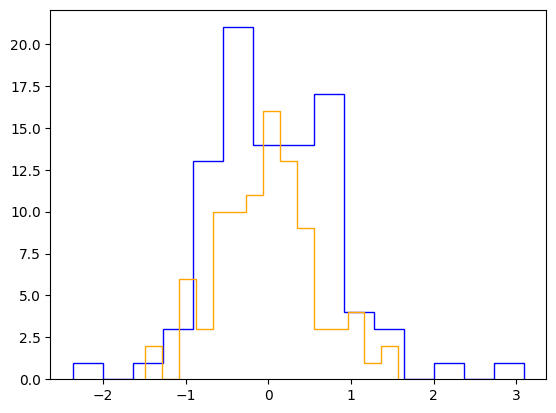

In [59]:
#plt.hist(hourly_to_daily['v10_d0_01_00'] - hourly_to_daily['v10_d1_01_00'], bins=15, histtype='step', edgecolor='blue')
#plt.hist(hourly_to_daily['v10_d0_09_00'] - hourly_to_daily['v10_h_09_00'], bins=15, histtype='step', edgecolor='orange')


plt.hist(hourly_to_daily['v10_d1_09_00'] - hourly_to_daily['v10_d0_09_00'], bins=15, histtype='step', edgecolor='blue') #1 day forecast - actual
plt.hist(hourly_to_daily['v10_d1_01_00'] - hourly_to_daily['v10_d0_01_00'], bins=15, histtype='step', edgecolor='orange') # last forecast - actual

(array([ 1.,  0.,  0.,  8., 15.,  8., 14., 18., 12.,  8.,  1.,  1.,  2.,
         1.,  2.]),
 array([-1.86 , -1.562, -1.264, -0.966, -0.668, -0.37 , -0.072,  0.226,
         0.524,  0.822,  1.12 ,  1.418,  1.716,  2.014,  2.312,  2.61 ]),
 <BarContainer object of 15 artists>)

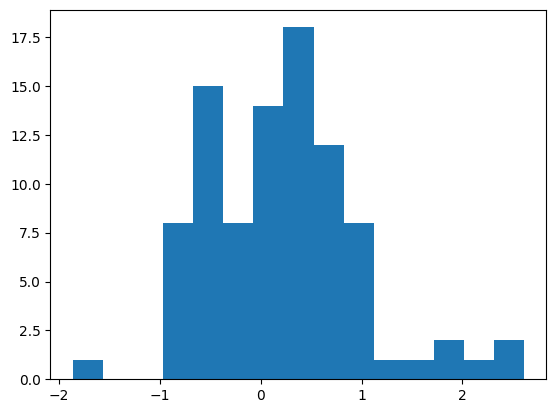

In [48]:
result.to_excel('C:/Users/Manuel/OneDrive/Arbeit/HTWG/Master/Daten/results.xlsx', index=False)

In [42]:
minute_to_daily_50Hertz(result)

C:\Users\Manuel\Documents\Masterarbeit\src\analysis\first_analysis.py:117: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, pdf, 'r-', label=f'Normal Fit\n$\mu={mean:.2f}$, $\sigma={std:.2f}$')
C:\Users\Manuel\Documents\Masterarbeit\src\analysis\first_analysis.py:117: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, pdf, 'r-', label=f'Normal Fit\n$\mu={mean:.2f}$, $\sigma={std:.2f}$')


AttributeError: 'int' object has no attribute 'seconds'

In [ ]:
# Filter rows where the hour in the 'time' column is 0 or a specific value (e.g., 12)
filtered_result = result[result['time'].dt.hour.isin([0, 0])]
filtered_result

,time,wind_speed_10m (m/s)_x,wind_speed_10m_previous_day1 (m/s),wind_speed_80m (m/s),wind_speed_80m_previous_day1 (m/s),wind_speed_120m (m/s),wind_speed_120m_previous_day1 (m/s),wind_speed_180m (m/s),wind_speed_180m_previous_day1 (m/s),wind_speed_10m (m/s)_y,wind_speed_100m (m/s)
0,2024-08-21,2.44,3.30,5.51,5.91,6.74,7.67,7.96,8.94,3.96,7.39
24,2024-08-22,1.30,1.08,3.28,3.20,3.61,4.24,3.72,5.00,1.91,3.83
48,2024-08-23,2.00,2.04,5.31,5.83,6.96,7.47,8.80,9.48,3.10,7.32
72,2024-08-24,1.39,2.06,4.20,5.67,5.68,6.94,6.55,8.15,2.97,6.96
96,2024-08-25,2.61,3.98,6.84,8.95,9.14,11.39,11.65,13.65,3.50,8.29
...,...,...,...,...,...,...,...,...,...,...,...
2112,2024-11-17,5.94,5.38,9.38,9.05,10.32,10.61,11.13,12.33,5.24,9.52
2136,2024-11-18,4.89,5.92,8.24,9.66,9.48,10.92,10.83,11.93,5.39,9.15
2160,2024-11-19,2.95,2.50,6.38,5.73,8.50,7.28,10.19,8.41,3.67,7.56
2184,2024-11-20,5.02,5.47,7.46,8.32,8.10,9.15,8.65,9.90,4.40,6.75


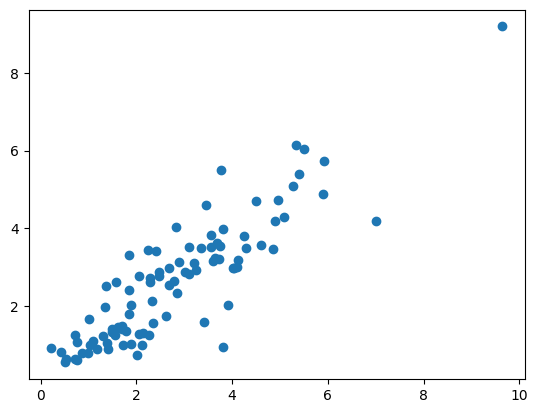

In [56]:
hours = [18]
plt.scatter(result[result['time'].dt.hour.isin(hours)]['wind_speed_10m (m/s)_x'], result[result['time'].dt.hour.isin(hours)]['wind_speed_10m_previous_day1 (m/s)'])

In [4]:
weather_forecasts = pd.read_csv('../data/weather_forecast/raw/open-meteo-55.90N2.30W194m.csv')
weather_forecasts


,latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation
0,55.9,-2.3000002,194.0,0.0,GMT,GMT
1,time,wind_speed_10m (m/s),wind_speed_80m (m/s),NaN,NaN,NaN
2,2021-03-01T00:00,NaN,NaN,NaN,NaN,NaN
3,2021-03-01T00:15,NaN,NaN,NaN,NaN,NaN
4,2021-03-01T00:30,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
125853,2024-10-01T22:45,6.74,10.54,NaN,NaN,NaN
125854,2024-10-01T23:00,6.66,10.47,NaN,NaN,NaN
125855,2024-10-01T23:15,6.65,10.47,NaN,NaN,NaN
125856,2024-10-01T23:30,6.72,10.71,NaN,NaN,NaN


In [3]:
weather_forecasts = load_weather_forecast()
weather_forecasts

,time,wind_speed_10m (m/s),wind_speed_80m (m/s)
0,2021-03-22T00:00,NaN,NaN
1,2021-03-22T00:15,NaN,NaN
2,2021-03-22T00:30,NaN,NaN
3,2021-03-22T00:45,NaN,NaN
4,2021-03-22T01:00,NaN,NaN
...,...,...,...
105307,2024-03-22T22:45,2.15,4.92
105308,2024-03-22T23:00,2.12,5.01
105309,2024-03-22T23:15,2.09,4.92
105310,2024-03-22T23:30,1.94,4.68


In [10]:
weather_forecasts.isna()

,time,wind_speed_10m (m/s),wind_speed_80m (m/s)
0,False,True,True
1,False,True,True
2,False,True,True
3,False,True,True
4,False,True,True
...,...,...,...
105307,False,False,False
105308,False,False,False
105309,False,False,False
105310,False,False,False


## Vorschlag vom Meeting am 22.11.2024: Evaluation mit historischen prognosen und Prognosenfehler dann interpretieren

In [2]:
historical_weather_forecast1 = pd.read_csv("../data/weather_forecast/raw/open-meteo-latitude_55.92_longitude_-2.30W103m_Historical_Forecast_API.csv",
                                           skiprows=3)
historical_weather_forecast2 = pd.read_csv("../data/weather_forecast/raw/open-meteo-latitude_55.92_longitude_-2.26W178m_Historical_Forecast_API.csv",
                                           skiprows=3)
historical_weather_forecast3 = pd.read_csv("../data/weather_forecast/raw/open-meteo-latitude_55.90_longitude_-2.30W210m_Historical_Forecast_API.csv",
                                           skiprows=3)
historical_weather_forecast4 = pd.read_csv("../data/weather_forecast/raw/open-meteo-latitude_55.9_longitude_-2.26W213m_Histoorical_Forecast_API.csv",
                                           skiprows=3)

In [3]:
historical_weather_forecast1 = historical_weather_forecast1.rename(
    columns={"wind_speed_80m (m/s)": "ws_80_lat_55.92_long_-2.30"},
    inplace=False
)

historical_weather_forecast2 = historical_weather_forecast2.rename(
    columns={"wind_speed_80m (m/s)": "ws_lat_55.92_long_-2.26_wind_speed_80m (m/s)"},
    inplace=False
)

historical_weather_forecast3 = historical_weather_forecast3.rename(
    columns={"wind_speed_80m (m/s)": "ws_lat_55.90_long_-2.30_wind_speed_80m (m/s)"},
    inplace=False
)

historical_weather_forecast4 = historical_weather_forecast4.rename(
    columns={"wind_speed_80m (m/s)": "ws_lat_55.9_long_-2.26_wind_speed_80m (m/s)"},
    inplace=False
)

In [6]:
# Merge all dataframes column-wise
dfs = [historical_weather_forecast1, historical_weather_forecast2, historical_weather_forecast3, historical_weather_forecast4]

# Start with the first dataframe
merged_df = dfs[0]

# Merge the remaining dataframes on 'time' using an outer join
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on="time", how="outer")

merged_df = merged_df.set_index("time", inplace=False)
merged_df.index = pd.to_datetime(merged_df.index)

# Optionally, print the merged dataframe to verify
merged_df

,ws_80_lat_55.92_long_-2.30,ws_lat_55.92_long_-2.26_wind_speed_80m (m/s),ws_lat_55.90_long_-2.30_wind_speed_80m (m/s),ws_lat_55.9_long_-2.26_wind_speed_80m (m/s)
time,,,,
2021-08-01 00:00:00,4.39,3.53,3.53,3.53
2021-08-01 00:15:00,4.57,3.58,3.58,3.58
2021-08-01 00:30:00,4.65,3.51,3.51,3.51
2021-08-01 00:45:00,4.83,3.54,3.54,3.54
2021-08-01 01:00:00,4.92,3.49,3.49,3.49
...,...,...,...,...
2024-11-01 22:45:00,3.69,4.47,4.08,4.52
2024-11-01 23:00:00,3.91,4.70,4.22,4.74
2024-11-01 23:15:00,4.05,4.83,4.36,4.88


In [44]:
df_10min_resampled = t_18.resample('15T').mean()

# Now merge the resampled 10-minute dataframe with the original 15-minute dataframe
comparison_df = pd.DataFrame({
    'wind turbine': df_10min_resampled['Wind speed (m/s)'],  # Replace 'column_name' with the actual column name
    'forecast': merged_df['ws_80_lat_55.92_long_-2.30']  # Replace 'column_name' with the actual column name
})

comparison_df

C:\Users\Manuel\AppData\Local\Temp\ipykernel_19536\1447635065.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10min_resampled = t_18.resample('15T').mean()


,wind turbine,forecast
time,,
2018-01-01 00:00:00,8.325,NaN
2018-01-01 00:15:00,11.250,NaN
2018-01-01 00:30:00,9.560,NaN
2018-01-01 00:45:00,6.860,NaN
2018-01-01 01:00:00,5.770,NaN
...,...,...
2024-11-01 22:45:00,NaN,3.69
2024-11-01 23:00:00,NaN,3.91
2024-11-01 23:15:00,NaN,4.05


In [35]:
m1 = merged_df.loc['2024-08-02']

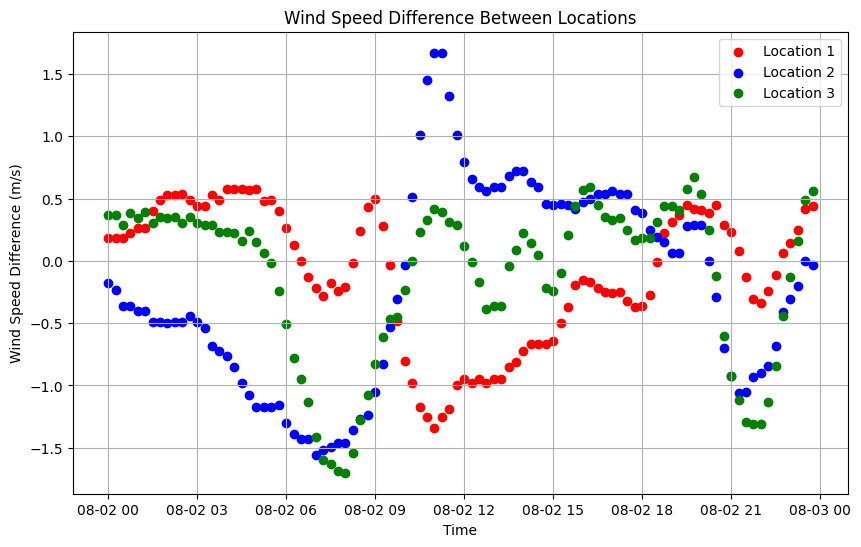

In [36]:
plt.figure(figsize=(10, 6))

# First scatter plot with red color
plt.scatter(m1.index, m1['ws_lat_55.92_long_-2.26_wind_speed_80m (m/s)'] - m1['ws_80_lat_55.92_long_-2.30'], c='r', label='Location 1')

# Second scatter plot with blue color
plt.scatter(m1.index, m1['ws_lat_55.90_long_-2.30_wind_speed_80m (m/s)'] - m1['ws_80_lat_55.92_long_-2.30'], c='b', label='Location 2')

# Third scatter plot with green color
plt.scatter(m1.index, m1['ws_lat_55.9_long_-2.26_wind_speed_80m (m/s)'] - m1['ws_80_lat_55.92_long_-2.30'], c='g', label='Location 3')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Wind Speed Difference (m/s)")
plt.title("Wind Speed Difference Between Locations")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()